In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


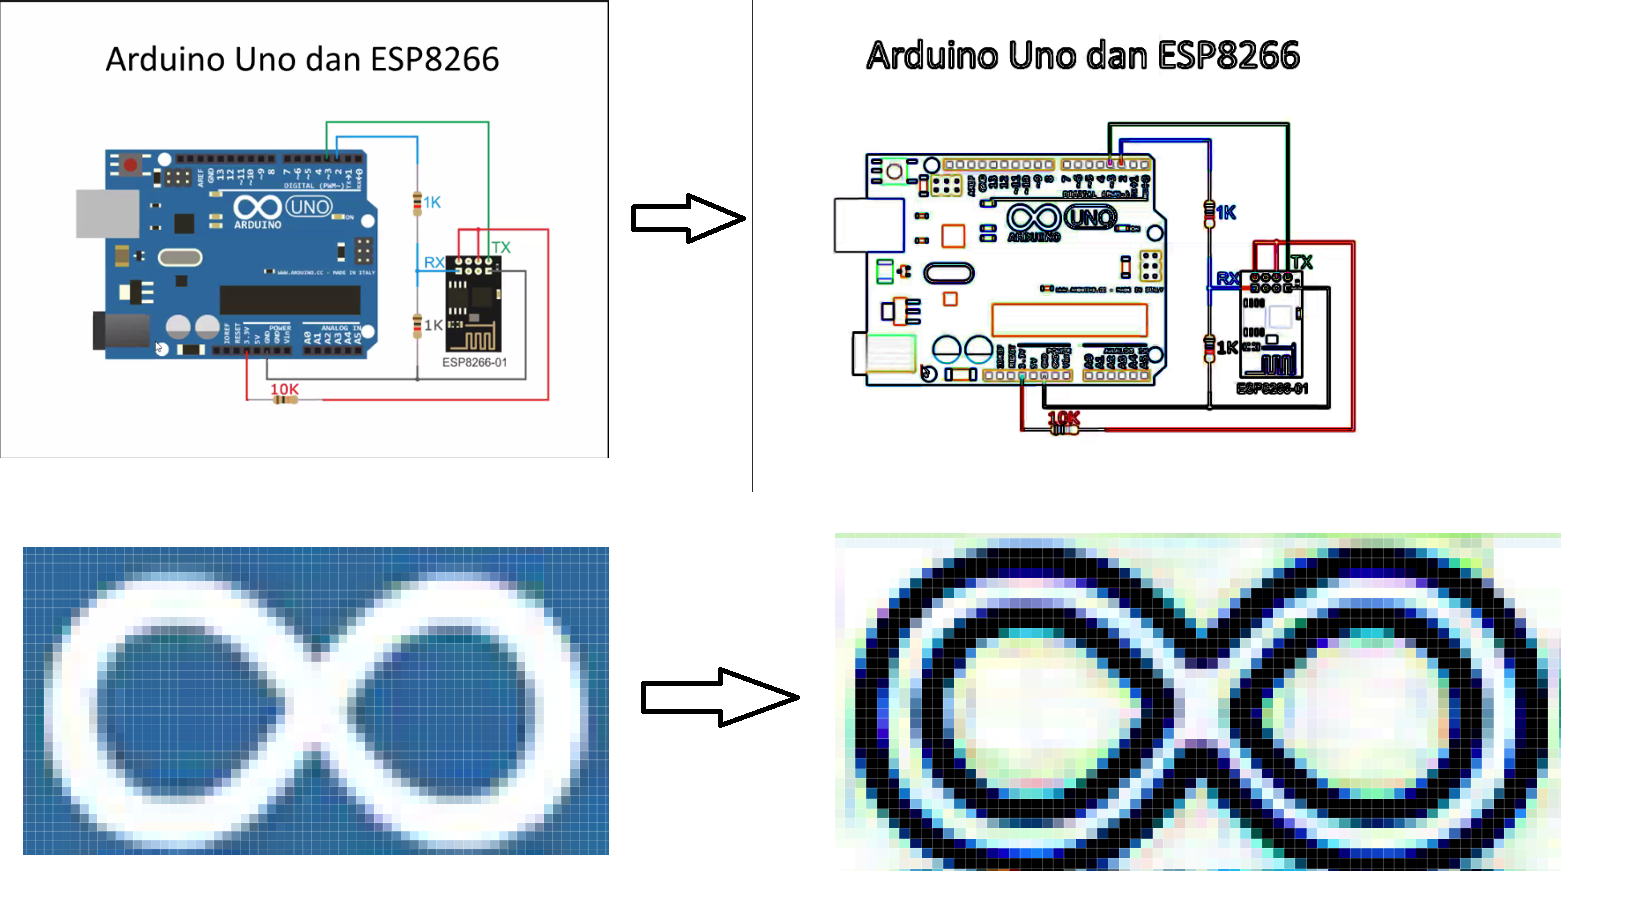

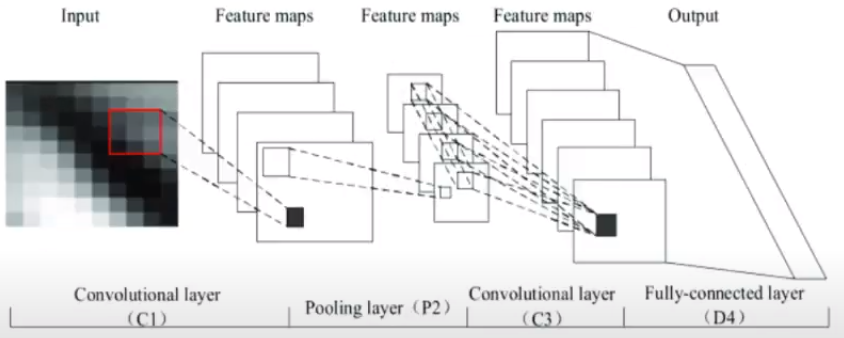

In [13]:
(xtrain, ytrain),(xtest,ytest) = mnist.load_data()

In [14]:
xtrain.shape

(60000, 28, 28)

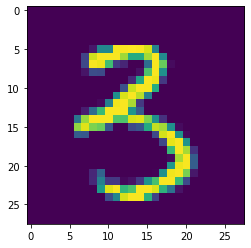

In [15]:
plt.imshow(xtest[5000].reshape(28,28))

In [16]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
ytrain = keras.utils.to_categorical(ytrain,10)
ytest = keras.utils.to_categorical(ytest,10)

In [17]:
ytrain[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation=Activation(tf.nn.softmax)))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1982592   
__________

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, batch_size=128,epochs=5,verbose=1,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 2432/60000 [>.............................] - ETA: 6:17 - loss: 0.6614 - acc: 0.8051

In [ ]:
model.predict(xtest[5200].reshape(1,28,28,1))

In [ ]:
ytest[5200]